In [2]:
%matplotlib widget

In [1]:
import os,sys,glob,shutil
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pygeotools.lib import iolib,geolib,malib,warplib,timelib
from imview import pltlib
from itertools import combinations
from distutils.spawn import find_executable

In [3]:
%cd /nobackup/sbhusha1/oic_challenge/mount_blanc_massif/Data-1_ICE-MontBlanc/Sentinel-2/

/nobackupp11/sbhusha1/oic_challenge/mount_blanc_massif/Data-1_ICE-MontBlanc/Sentinel-2


In [8]:
img1_fn = 'T32TLR_20200812T103031_B08.tif'
img2_fn = 'T32TLR_20200916T102649_B08.tif'
img3_fn = 'T32TLR_20210812T102559_B08.tif'
ds_list = warplib.memwarp_multi_fn([img1_fn,img2_fn,img3_fn])
img1,img2,img3 = [iolib.ds_getma(ds) for ds in ds_list]


Warping all inputs to the following:
Resolution: 10.0
Extent: [320610.0, 5064770.0, 353850.0, 5100000.0]
Projection: '+proj=utm +zone=32 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 3: T32TLR_20200812T103031_B08.tif
2 of 3: T32TLR_20200916T102649_B08.tif
3 of 3: T32TLR_20210812T102559_B08.tif


<Axes: >

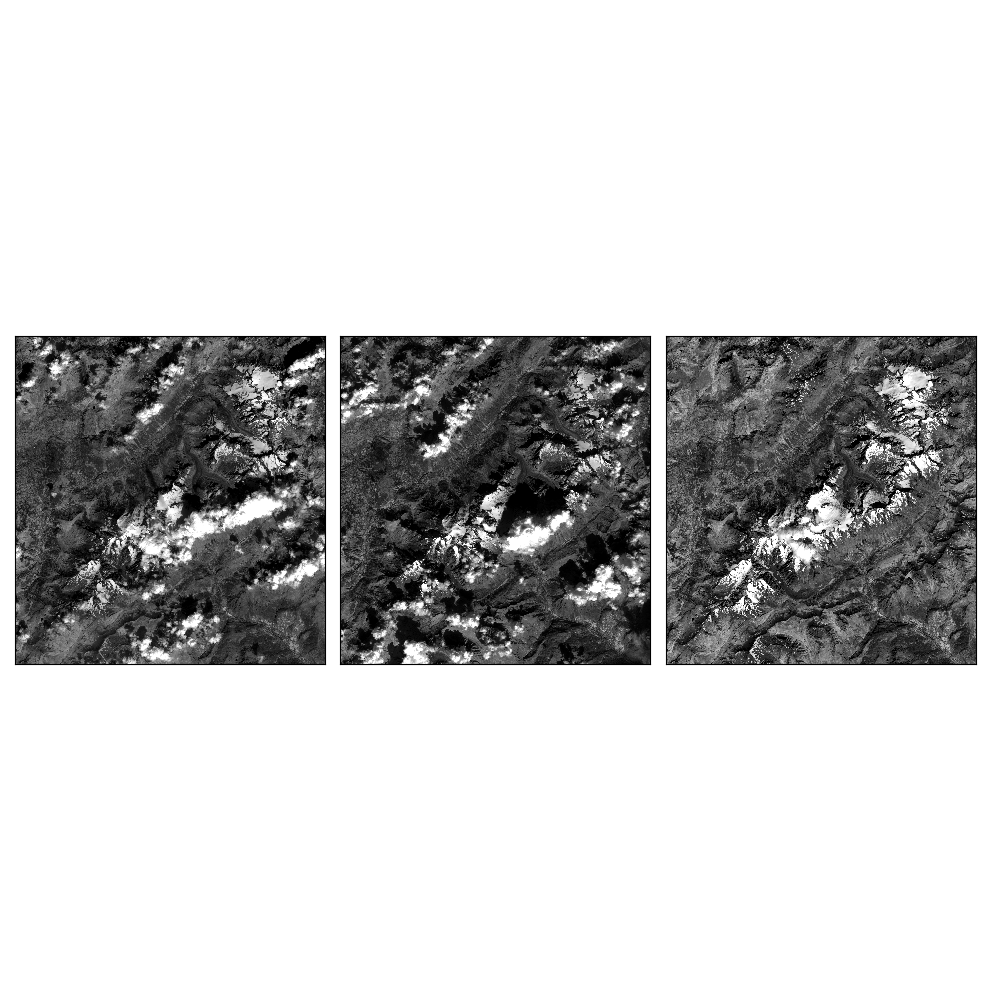

In [10]:
f,ax = plt.subplots(1,3,figsize=(10,10))
cmap_ortho = 'gray'
pltlib.iv(img1,ax=ax[0],cmap=cmap_ortho,cbar=False)
pltlib.iv(img2,ax=ax[1],cmap=cmap_ortho,cbar=False)
pltlib.iv(img3,ax=ax[2],cmap=cmap_ortho,cbar=False)

In [4]:
test_vx_fn1 = '../T32TLR_20200807T102559_B08__T32TLR_20200916T102649_B08_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin/T32TLR_20200807T102559_B08__T32TLR_20200916T102649_B08_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_vx_offsetcorr_h0.04_v-0.22_skiprate_1.tif'
test_vy_fn1 = '../T32TLR_20200807T102559_B08__T32TLR_20200916T102649_B08_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin/T32TLR_20200807T102559_B08__T32TLR_20200916T102649_B08_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_vy_offsetcorr_h0.04_v-0.22_skiprate_1.tif'
test_vm_fn1 = '../T32TLR_20200807T102559_B08__T32TLR_20200916T102649_B08_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin/T32TLR_20200807T102559_B08__T32TLR_20200916T102649_B08_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_vm_offsetcorr_h0.04_v-0.22_skiprate_1.tif'
vx,vy,vm, = [iolib.fn_getma(fn) for fn in [test_vx_fn1,test_vy_fn1,test_vm_fn1]]

<Axes: >

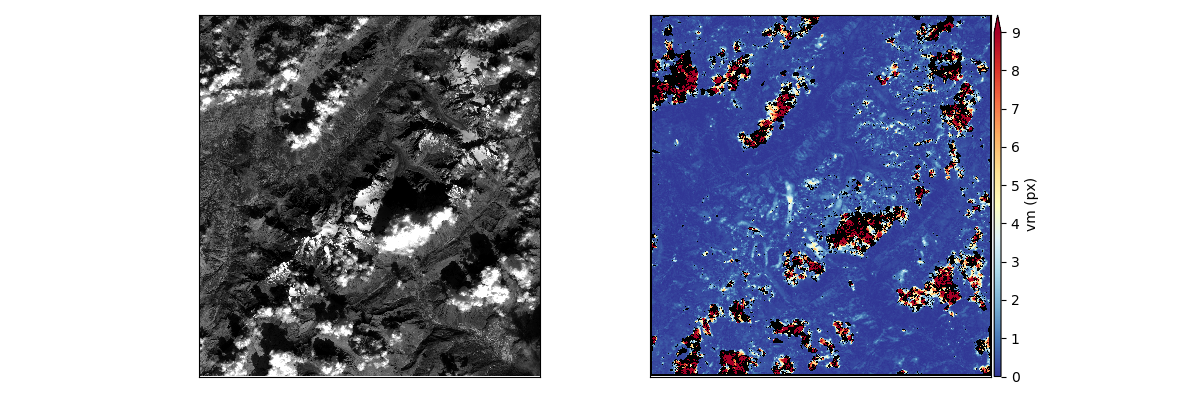

In [11]:
f,ax = plt.subplots(1,2,sharex=True,sharey=True,figsize=(12,4))
dir_cmap = 'RdBu'
mag_cmap = 'RdYlBu_r'
clim = (-4,4)
clim_mag = (0,9)
pltlib.iv(img2,ax=ax[0],cmap=cmap_ortho,cbar=False)
pltlib.iv(vm,ax=ax[1],cmap=mag_cmap,label='vm (px)',clim=clim_mag)

<Axes: >

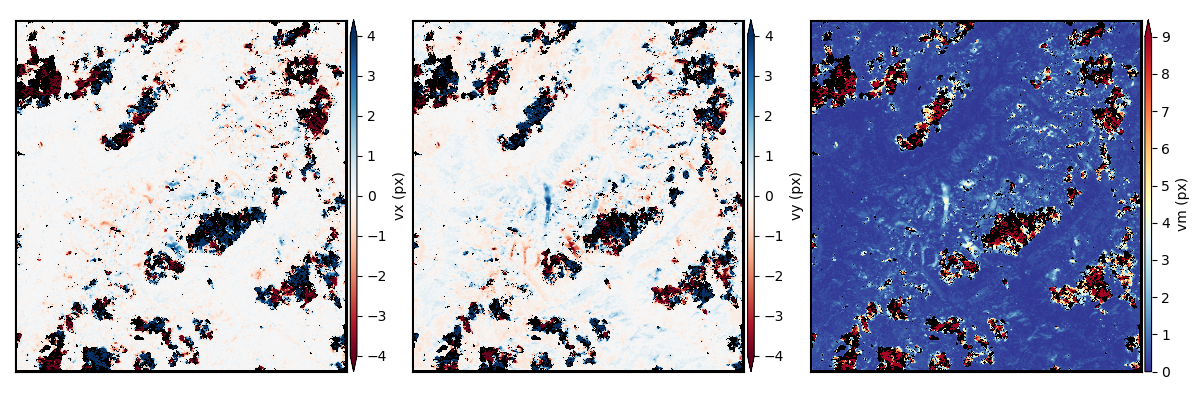

In [6]:
f,ax = plt.subplots(1,3,sharex=True,sharey=True,figsize=(12,4))
dir_cmap = 'RdBu'
mag_cmap = 'RdYlBu_r'
clim = (-4,4)
clim_mag = (0,9)
pltlib.iv(vx,ax=ax[0],cmap=dir_cmap,label='vx (px)',clim=clim)
pltlib.iv(vy,ax=ax[1],cmap=dir_cmap,label='vy (px)',clim=clim)
pltlib.iv(vm,ax=ax[2],cmap=mag_cmap,label='vm (px)',clim=clim_mag)

## Prepare jobs

### S2-MGM

In [19]:
date_list = ['20200812','20200916','20210812']
img_list = []
for idx,date in  enumerate(date_list):
    img = sorted(glob.glob(f'T32TLR_{date}T*.tif'))[0]
    img_list.append(img)
comb = list(combinations(img_list,2))
job_fn = '/nobackupp11/sbhusha1/oic_challenge/mount_blanc_massif/results/s2_mgm/s2_jobs.txt'
with open(job_fn,'w') as f:
    for pairs in comb:
        img1,img2 = pairs
        cmd = '/swbuild/sbhusha1/pip_git_sw/debris_cover_smb/scripts/disp_mgm_corr.py'
        parameter_str = f" -dt px -skip_rate 1 -pleiades {os.path.abspath(img1)} {os.path.abspath(img2)}\n"
        f.write(cmd+parameter_str)

## S2-Block

In [22]:
date_list = ['20200812','20200916','20210812']
img_list = []
for idx,date in  enumerate(date_list):
    img = sorted(glob.glob(f'T32TLR_{date}T*.tif'))[0]
    img_list.append(img)
comb = list(combinations(img_list,2))
job_fn = '/nobackupp11/sbhusha1/oic_challenge/mount_blanc_massif/results/s2_block/s2_jobs.txt'
with open(job_fn,'w') as f:
    for pairs in comb:
        img1,img2 = pairs
        cmd = find_executable('vmap.py')
        parameter_str = f" {os.path.abspath(img1)} {os.path.abspath(img2)} -dt none\n"
        f.write(cmd+parameter_str)

## Plieades

In [23]:
%cd /nobackup/sbhusha1/oic_challenge/mount_blanc_massif/Data-1_ICE-MontBlanc/Pleiades/Pleiades_ortho/

/nobackupp11/sbhusha1/oic_challenge/mount_blanc_massif/Data-1_ICE-MontBlanc/Pleiades/Pleiades_ortho


In [24]:
date_list = ['20200809','20200917','20210815']
img_list = []
for idx,date in  enumerate(date_list):
    img = sorted(glob.glob(f'{date}*.tif'))[0]
    img_list.append(img)
comb = list(combinations(img_list,2))
job_fn = '/nobackupp11/sbhusha1/oic_challenge/mount_blanc_massif/results/phr_ortho/phr_ortho_jobs.txt'
with open(job_fn,'w') as f:
    for pairs in comb:
        img1,img2 = pairs
        cmd = '/swbuild/sbhusha1/pip_git_sw/debris_cover_smb/scripts/disp_mgm_corr.py'
        parameter_str = f" -dt px -skip_rate 1 -pleiades {os.path.abspath(img1)} {os.path.abspath(img2)}\n"
        f.write(cmd+parameter_str)

## Prepare displacement maps in m

In [1]:
%cd /nobackup/sbhusha1/oic_challenge/mount_blanc_massif/results/

/nobackupp11/sbhusha1/oic_challenge/mount_blanc_massif/results


In [4]:
disp_rd_fn_list = sorted(glob.glob('s2_block/T*/T*F.tif'))
print(f"The program produced {len(disp_rd_fn_list)} velocity pairs")
                         

The program produced 3 velocity pairs


In [5]:
outdir = 'asp_block/Sentinel2/'
ic_of_outdir = os.path.join(outdir,'IC-OF_RESULTS')
velocity_outdir = os.path.join(outdir,'VELOCITY')
displacement_outdir = os.path.join(outdir,'DISPLACEMENT')
if not os.path.exists(outdir):
    os.makedirs(outdir)
if not os.path.exists(ic_of_outdir):
    os.makedirs(ic_of_outdir)
if not os.path.exists(velocity_outdir):
    os.makedirs(velocity_outdir)
if not os.path.exists(displacement_outdir):
    os.makedirs(displacement_outdir)

In [6]:
def write_out_oic_results_block_matching(disp_fn):
    t1, t2 = timelib.fn_getdatetime_list(disp_fn)
    ds = iolib.fn_getds(disp_fn)
    disp_x,disp_y = [iolib.ds_getma(ds,x) for x in [1,2]]
    t1_str = t1.strftime('%Y%m%d') 
    t2_str = t2.strftime('%Y%m%d') 
    dt = t2 - t1
    t_factor = timelib.get_t_factor(t1,t2)
    gt = ds.GetGeoTransform()
    proj = ds.GetProjection()
    ic_oc_vx_fn = os.path.join(ic_of_outdir,f'EW_{t1_str}-{t2_str}_raw.tif')
    ic_oc_vy_fn = os.path.join(ic_of_outdir,f'NS_{t1_str}-{t2_str}_raw.tif')
    iolib.writeGTiff(disp_x, ic_oc_vx_fn,ndv=-9999,gt=gt,proj=proj)
    iolib.writeGTiff(disp_y, ic_oc_vy_fn,ndv=-9999,gt=gt,proj=proj)
    
    disp_oc_vx_fn = os.path.join(displacement_outdir,f'EW_{t1_str}-{t2_str}_disp_tot.tif')
    disp_oc_vy_fn = os.path.join(displacement_outdir,f'NS_{t1_str}-{t2_str}_disp_tot.tif')
    res_x,res_y = geolib.get_res(ds)
    iolib.writeGTiff(disp_x*res_x, disp_oc_vx_fn,ndv=-9999,gt=gt,proj=proj)
    iolib.writeGTiff(disp_y*res_y, disp_oc_vy_fn,ndv=-9999,gt=gt,proj=proj)
    
    vel_oc_vx_fn = os.path.join(velocity_outdir,f'EW_{t1_str}-{t2_str}_vel_mean.tif')
    vel_oc_vy_fn = os.path.join(velocity_outdir,f'NS_{t1_str}-{t2_str}_vel_mean.tif')
    iolib.writeGTiff((disp_x*res_x)/t_factor, vel_oc_vx_fn,ndv=-9999,gt=gt,proj=proj)
    iolib.writeGTiff((disp_y*res_y)/t_factor, vel_oc_vy_fn,ndv=-9999,gt=gt,proj=proj)

In [7]:
for disp in disp_rd_fn_list:
    write_out_oic_results_block_matching(disp)

## MGM writeout

In [8]:
outdir = 'asp_mgm/Sentinel2/'
ic_of_outdir = os.path.join(outdir,'IC-OF_RESULTS')
velocity_outdir = os.path.join(outdir,'VELOCITY')
displacement_outdir = os.path.join(outdir,'DISPLACEMENT')
if not os.path.exists(outdir):
    os.makedirs(outdir)
if not os.path.exists(ic_of_outdir):
    os.makedirs(ic_of_outdir)
if not os.path.exists(velocity_outdir):
    os.makedirs(velocity_outdir)
if not os.path.exists(displacement_outdir):
    os.makedirs(displacement_outdir)

In [9]:
vx_fn_list = sorted(glob.glob('s2_mgm/T*/T*_vx*.tif'))
vy_fn_list = sorted(glob.glob('s2_mgm/T*/T*_vy*.tif'))
print(f"The program produced {len(vx_fn_list)} velocity pairs")
                         

The program produced 3 velocity pairs


In [10]:
def write_out_oic_results_mgm_matching(vx_fn,vy_fn):
    t1, t2 = timelib.fn_getdatetime_list(vx_fn)
    vx_ds = iolib.fn_getds(vx_fn)
    vy_ds = iolib.fn_getds(vy_fn)
    disp_x,disp_y = [iolib.ds_getma(ds) for ds in [vx_ds,vy_ds]]
    t1_str = t1.strftime('%Y%m%d') 
    t2_str = t2.strftime('%Y%m%d') 
    dt = t2 - t1
    t_factor = timelib.get_t_factor(t1,t2)
    gt = vx_ds.GetGeoTransform()
    proj = vx_ds.GetProjection()
    ic_oc_vx_fn = os.path.join(ic_of_outdir,f'EW_{t1_str}-{t2_str}_raw.tif')
    ic_oc_vy_fn = os.path.join(ic_of_outdir,f'NS_{t1_str}-{t2_str}_raw.tif')
    iolib.writeGTiff(disp_x, ic_oc_vx_fn,ndv=-9999,gt=gt,proj=proj)
    iolib.writeGTiff(disp_y, ic_oc_vy_fn,ndv=-9999,gt=gt,proj=proj)
    
    disp_oc_vx_fn = os.path.join(displacement_outdir,f'EW_{t1_str}-{t2_str}_disp_tot.tif')
    disp_oc_vy_fn = os.path.join(displacement_outdir,f'NS_{t1_str}-{t2_str}_disp_tot.tif')
    res_x,res_y = geolib.get_res(vx_ds)
    iolib.writeGTiff(disp_x*res_x, disp_oc_vx_fn,ndv=-9999,gt=gt,proj=proj)
    iolib.writeGTiff(disp_y*res_y, disp_oc_vy_fn,ndv=-9999,gt=gt,proj=proj)
    
    vel_oc_vx_fn = os.path.join(velocity_outdir,f'EW_{t1_str}-{t2_str}_vel_mean.tif')
    vel_oc_vy_fn = os.path.join(velocity_outdir,f'NS_{t1_str}-{t2_str}_vel_mean.tif')
    iolib.writeGTiff((disp_x*res_x)/t_factor, vel_oc_vx_fn,ndv=-9999,gt=gt,proj=proj)
    iolib.writeGTiff((disp_y*res_y)/t_factor, vel_oc_vy_fn,ndv=-9999,gt=gt,proj=proj)

In [11]:
for idx,vx_fn in enumerate(vx_fn_list):
    write_out_oic_results_mgm_matching(vx_fn,vy_fn_list[idx])

## PHR writeout

In [12]:
outdir = 'asp_mgm/PHR_Ortho/'
ic_of_outdir = os.path.join(outdir,'IC-OF_RESULTS')
velocity_outdir = os.path.join(outdir,'VELOCITY')
displacement_outdir = os.path.join(outdir,'DISPLACEMENT')
if not os.path.exists(outdir):
    os.makedirs(outdir)
if not os.path.exists(ic_of_outdir):
    os.makedirs(ic_of_outdir)
if not os.path.exists(velocity_outdir):
    os.makedirs(velocity_outdir)
if not os.path.exists(displacement_outdir):
    os.makedirs(displacement_outdir)

In [13]:
vx_fn_list = sorted(glob.glob('phr_ortho/2*/2*_vx*.tif'))
vy_fn_list = sorted(glob.glob('phr_ortho/2*/2*_vy*.tif'))
print(f"The program produced {len(vx_fn_list)} velocity pairs")

The program produced 3 velocity pairs


In [14]:
for idx,vx_fn in enumerate(vx_fn_list):
    write_out_oic_results_mgm_matching(vx_fn,vy_fn_list[idx])

### Replace Quinn's results

In [12]:
%cd /nobackup/sbhusha1/oic_challenge/

/nobackupp11/sbhusha1/oic_challenge


In [13]:
displacement_results = sorted(glob.glob('mount_blanc_massif/results/quinn/OIC_mount_blanc_massif_glacier/Sentinel2/DISPLACEMENT/*ndv.tif'))
velocity_results = sorted(glob.glob('mount_blanc_massif/results/quinn/OIC_mount_blanc_massif_glacier/Sentinel2/VELOCITY/*ndv.tif'))
px_results = sorted(glob.glob('mount_blanc_massif/results/quinn/OIC_mount_blanc_massif_glacier/Sentinel2/IC-OF_RESULTS/*ndv.tif'))

In [14]:
displacement_results

['mount_blanc_massif/results/quinn/OIC_mount_blanc_massif_glacier/Sentinel2/DISPLACEMENT/EW_20200812-20200916_disp_tot_ndv.tif',
 'mount_blanc_massif/results/quinn/OIC_mount_blanc_massif_glacier/Sentinel2/DISPLACEMENT/EW_20200812-20210812_disp_tot_ndv.tif',
 'mount_blanc_massif/results/quinn/OIC_mount_blanc_massif_glacier/Sentinel2/DISPLACEMENT/EW_20200916-20210812_disp_tot_ndv.tif',
 'mount_blanc_massif/results/quinn/OIC_mount_blanc_massif_glacier/Sentinel2/DISPLACEMENT/NS_20200812-20200916_disp_tot_ndv.tif',
 'mount_blanc_massif/results/quinn/OIC_mount_blanc_massif_glacier/Sentinel2/DISPLACEMENT/NS_20200812-20210812_disp_tot_ndv.tif',
 'mount_blanc_massif/results/quinn/OIC_mount_blanc_massif_glacier/Sentinel2/DISPLACEMENT/NS_20200916-20210812_disp_tot_ndv.tif']

In [15]:
for idx,displacement in enumerate(displacement_results):
    displacement_outdir = 'university_of_washington_results/Site1/Sentinel2/autoRIFT/DISPLACEMENT'
    velocity_outdir = 'university_of_washington_results/Site1/Sentinel2/autoRIFT/VELOCITY'
    px_outdir = 'university_of_washington_results/Site1/Sentinel2/autoRIFT/IC-OF_RESULTS'
    if not os.path.exists(displacement_outdir):
        os.makedirs(displacement_outdir)
    if not os.path.exists(velocity_outdir):
        os.makedirs(velocity_outdir)
    if not os.path.exists(px_outdir):
        os.makedirs(px_outdir)
    out_displacement = os.path.join(displacement_outdir,os.path.basename(displacement).split('_ndv.tif')[0]+'.tif')
    out_velocity = os.path.join(velocity_outdir,os.path.basename(velocity_results[idx]).split('_ndv.tif')[0]+'.tif')
    out_px = os.path.join(px_outdir,os.path.basename(px_results[idx]).split('_ndv.tif')[0]+'.tif')
    shutil.copy2(displacement,out_displacement)
    shutil.copy2(velocity_results[idx],out_velocity)
    shutil.copy2(px_results[idx],out_px)

In [6]:
displacement_results = sorted(glob.glob('mount_blanc_massif/results/eric/Site1/Sentinel2/DISPLACEMENT/*ndv.tif'))
velocity_results = sorted(glob.glob('mount_blanc_massif/results/eric/Site1/Sentinel2/VELOCITY/*ndv.tif'))
px_results = sorted(glob.glob('mount_blanc_massif/results/eric/Site1/Sentinel2/IC-OF_RESULTS/*ndv.tif'))

In [7]:
for idx,displacement in enumerate(displacement_results):
    displacement_outdir = 'university_of_washington_results/Site1/Sentinel2/geofolki/DISPLACEMENT'
    velocity_outdir = 'university_of_washington_results/Site1/Sentinel2/geofolki/VELOCITY'
    px_outdir = 'university_of_washington_results/Site1/Sentinel2/geofolki/IC-OF_RESULTS'
    if not os.path.exists(displacement_outdir):
        os.makedirs(displacement_outdir)
    if not os.path.exists(velocity_outdir):
        os.makedirs(velocity_outdir)
    if not os.path.exists(px_outdir):
        os.makedirs(px_outdir)
    out_displacement = os.path.join(displacement_outdir,os.path.basename(displacement).split('_ndv.tif')[0]+'.tif')
    out_velocity = os.path.join(velocity_outdir,os.path.basename(velocity_results[idx]).split('_ndv.tif')[0]+'.tif')
    out_px = os.path.join(px_outdir,os.path.basename(px_results[idx]).split('_ndv.tif')[0]+'.tif')
    shutil.copy2(displacement,out_displacement)
    shutil.copy2(velocity_results[idx],out_velocity)
    shutil.copy2(px_results[idx],out_px)